In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score,mean_squared_error

In [2]:
df = pd.read_csv('D:\python folder\RD.csv')

In [3]:
df.head()

,Months,Mean,Total,Average
0,January,22.5,20.4,4.08
1,February,2.2,24.4,4.88
2,March,4.0,13.6,2.72
3,April,7.7,16.2,3.24
4,May,43.9,233.6,46.72


In [4]:
threshold = 50.8

In [5]:
df['Flood'] = df['Average'].apply(lambda x: 1 if x > threshold else 0)

In [6]:
X = df["Mean"].values.reshape(-1, 1)
y = df["Flood"].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import confusion_matrix

In [8]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_pred_binary = np.where(linear_reg_pred >= threshold, 1, 0)
linear_reg_accuracy = accuracy_score(y_test, linear_reg_pred_binary)

In [9]:
linear_reg_accuracy = accuracy_score(y_test, linear_reg_pred_binary)
linear_reg_precision = precision_score(y_test, linear_reg_pred_binary)
linear_reg_f1 = f1_score(y_test, linear_reg_pred_binary)

C:\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

In [11]:
LR_accuracy = accuracy_score(y_test, LR_pred)
LR_precision = precision_score(y_test, LR_pred)
LR_f1 = f1_score(y_test, LR_pred)
LR_confusion_matrix = confusion_matrix(y_test, LR_pred)

In [12]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)


In [13]:
RF_accuracy = accuracy_score(y_test, random_forest_pred)
RF_precision = precision_score(y_test, random_forest_pred)
RF_f1 = f1_score(y_test, random_forest_pred)
RF_confusion_matrix = confusion_matrix(y_test, random_forest_pred)

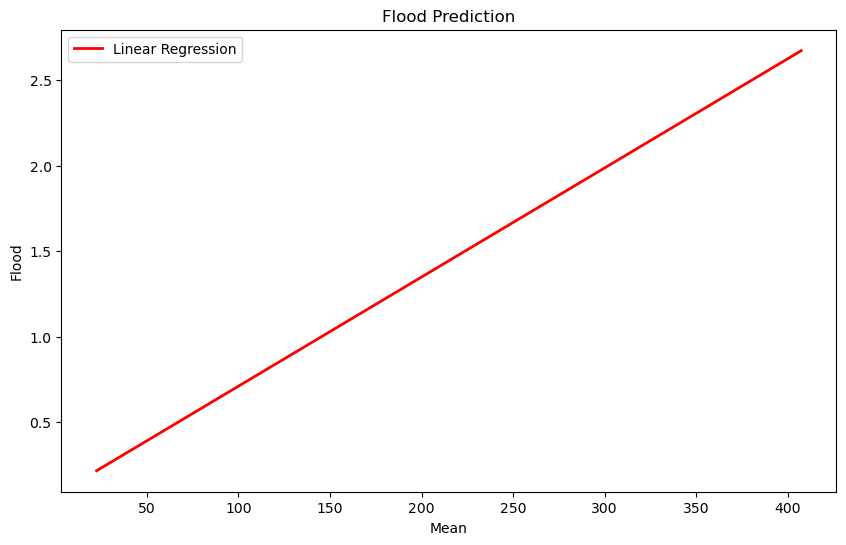

In [14]:
plt.figure(figsize=(10, 6))
#plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, linear_reg_pred, color='red', linewidth=2, label='Linear Regression')
#plt.plot(X_test, LR_pred, color='green', linewidth=2, label='Logistic Regression')
#plt.plot(X_test, random_forest_pred, color='purple', linewidth=2, label='Random Forest')
plt.xlabel('Mean')
plt.ylabel('Flood')
plt.title('Flood Prediction')
plt.legend()
plt.show()

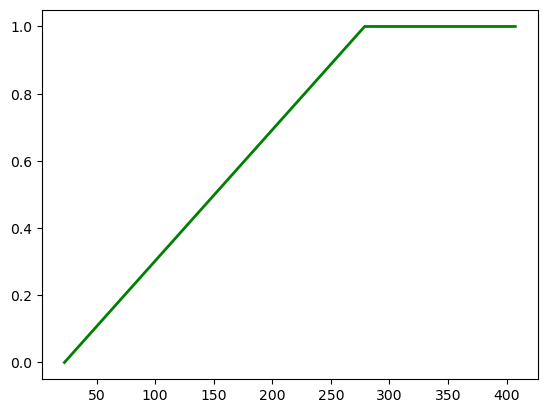

In [15]:
plt.plot(X_test, LR_pred, color='green', linewidth=2, label='Logistic Regression')
plt.show()

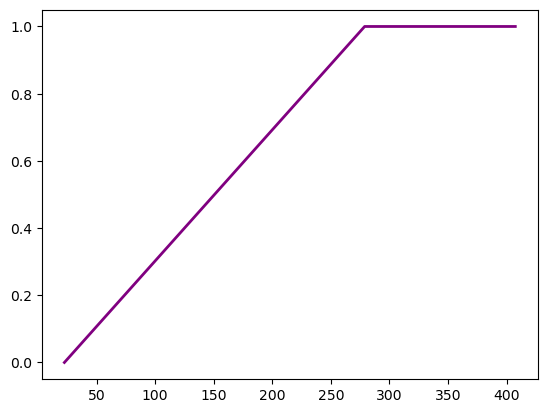

In [16]:
plt.plot(X_test, random_forest_pred, color='purple', linewidth=2, label='Random Forest')
plt.show()

In [17]:
print("Linear Regression Accuracy:", linear_reg_accuracy)
print("Linear Regression Precision:", linear_reg_precision)
print("Linear Regression F1 Score:", linear_reg_f1)
print("Logistic Regression Accuracy:", LR_accuracy)
print("Logistic Regression Precision:", LR_precision)
print("Logistic Regression F1 Score:", LR_f1)
print("Random Forest Accuracy:", RF_accuracy)
print("Random Forest Precision:", RF_precision)
print("Random Forest F1 Score:",RF_f1)

Linear Regression Accuracy: 0.3333333333333333
Linear Regression Precision: 0.0
Linear Regression F1 Score: 0.0
Logistic Regression Accuracy: 1.0
Logistic Regression Precision: 1.0
Logistic Regression F1 Score: 1.0
Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest F1 Score: 1.0


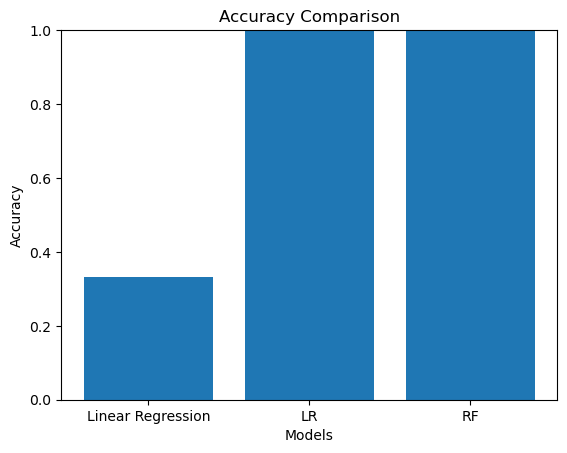

In [18]:
models = ['Linear Regression', 'LR', 'RF']
accuracies = [linear_reg_accuracy, LR_accuracy, RF_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

In [19]:
print("\nLogistic Regression Confusion Matrix:")
print(LR_confusion_matrix)
print("\n Random Forest Confusion Matrix:")
print(RF_confusion_matrix)


Logistic Regression Confusion Matrix:
[[1 0]
 [0 2]]

 Random Forest Confusion Matrix:
[[1 0]
 [0 2]]
